# Assignment 2

# 1. Regression

In this assignment, you will explore the California Housing Prices dataset. Your task is to apply various regression techniques, specifically Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression, to predict housing prices.


### Dataset
We will use the "California Housing Prices" Xset from the `sklearn.Xsets` module for ease of access. 

### Objectives
1. Perform exploratory X analysis (EDA) to understand the Xset.
2. Apply Kernel Ridge Regression (KRR) with different hyperparameters and analyze the results.
3. Implement Bayesian Linear Regression and discuss the posterior distributions.
4. Explore Gaussian Process Regression and visualize the prediction uncertainties.
5. Compare the performance of the three regression techniques and discuss your findings.

## Tasks

#### 4. Gaussian Process Regression
- Apply Gaussian Process Regression to the Xset.
- Visualize the prediction uncertainties.
- Discuss how the Gaussian Process handles uncertainty in predictions.

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.



### 1. Data Exploration and Preprocessing
- Use the knowledge you gain from previouse assignment on this dataset. 
- You do not have to repeat the visualization of the data, only remeber the important fact that you gain by analysing it. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [3]:
# Creating new features

import pandas as pd
import numpy as np

# Assuming data is your DataFrame and the columns are all numeric
X['MedInc_HouseAge'] = X['MedInc'] * X['HouseAge']
X['Age_bins'] = pd.cut(X['HouseAge'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])
X['TotalRooms'] = X['Population'] / X['AveOccup']

X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,TotalRooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,108.008027,499.539680
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,74.386418,382.329753
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.625000,1.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,57.997425,280.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,92.502950,409.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,140.104900,605.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,780.005200,6082.000000


#### 2. Kernel Ridge Regression (KRR)
- Apply KRR to the dataset.
- Experiment with different kernels and regularization parameters.
- Analyze the performance and discuss how different hyperparameters impact the model.

In [4]:
KernelRidge?

Init signature:
KernelRidge(
    alpha=1,
    *,
    kernel='linear',
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None,
)
Docstring:     
Kernel ridge regression.

Kernel ridge regression (KRR) combines ridge regression (linear least
squares with l2-norm regularization) with the kernel trick. It thus
learns a linear function in the space induced by the respective kernel and
the data. For non-linear kernels, this corresponds to a non-linear
function in the original space.

The form of the model learned by KRR is identical to support vector
regression (SVR). However, different loss functions are used: KRR uses
squared error loss while support vector regression uses epsilon-insensitive
loss, both combined with l2 regularization. In contrast to SVR, fitting a
KRR model can be done in closed-form and is typically faster for
medium-sized datasets. On the other hand, the learned model is non-sparse
and thus slower than SVR, which learns a sparse model for epsilon > 0, at
pred

In [5]:
# Using Kernel Ridge can make a lot of sense when working with the california housing prices dataset since, in the first assignment we saw that there were significant outliers present in the data. Even though these in most cases could be handled by i.e. taking logarithm of the target variable, it is still a good idea to use a model that is robust to outliers. 

def kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, kernel):
    kr = KernelRidge(kernel=kernel, alpha=0.1, gamma=0.1)
    kr.fit(X_train_scaled, y_train)
    y_pred = kr.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

linear_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'linear')
rbf_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'rbf')
laplacian_rmse = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'laplacian')

print(f"RMSE for linear kernel: {linear_rmse}")
print(f"RMSE for rbf kernel: {rbf_rmse}")
print(f"RMSE for laplacian kernel: {laplacian_rmse}")


RMSE for linear kernel: 2.2052818990051413
RMSE for rbf kernel: 0.5697829128116272
RMSE for laplacian kernel: 0.4720307071687382


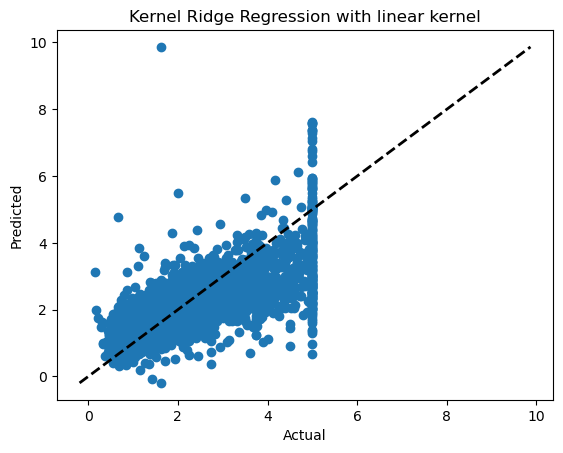

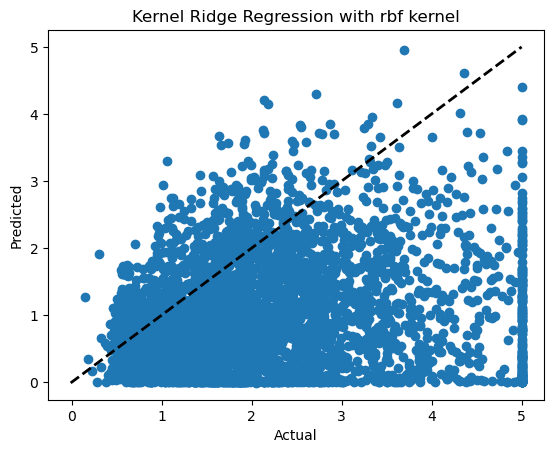

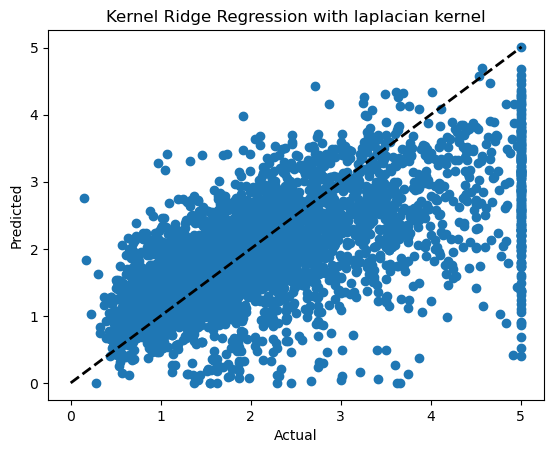

#### 3. Bayesian Linear Regression
- Implement Bayesian Linear Regression. You can use  Bayesian Ridge Regression function from Scikit-Learn.
- Visualize the posterior distributions of the coefficients (at least one coefficient).
- Discuss the insights gained from the posterior analysis.

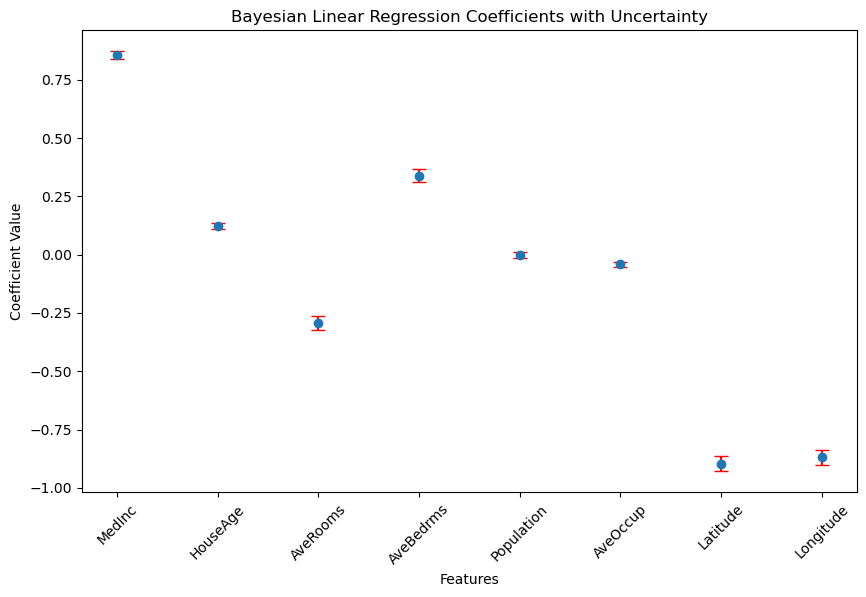

In [16]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef, #  to approximate the 95% confidence interval for the coefficients.  95% of the values lie within approximately 1.96 standard deviations from the mean.(coefficient - 1.96 * std_dev)  
             fmt='o', 
             ecolor='r',
             capsize=5)
plt.xticks(range(len(bayesian_model.coef_)), data.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.show()

In [17]:
from sklearn.gaussian_process.kernels import Matern

kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5)
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)


gpr_model.fit(X_train_scaled, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test_scaled, return_std=True)

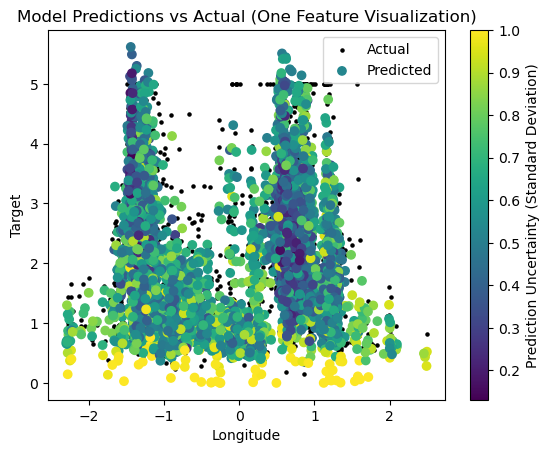

In [18]:
# Select one feature for visualization (for example, the first feature)
feature_index = 7
selected_feature = X_test_scaled[:, feature_index]

# Plot
plt.scatter(selected_feature, y_test, color='black', s = 5 ,label='Actual')

scatter = plt.scatter(selected_feature, y_pred_gpr,  c=std_dev_gpr, cmap='viridis', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel(data.feature_names[feature_index])
plt.ylabel('Target')
plt.title('Model Predictions vs Actual (One Feature Visualization)')
plt.legend()
plt.show()

In [19]:
# Evaluate the models
mse_krr = mean_squared_error(y_test, y_pred_krr)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
mse_gpr = mean_squared_error(y_test, y_pred_gpr)

r2_krr = r2_score(y_test, y_pred_krr)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
r2_gpr = r2_score(y_test, y_pred_gpr)

# Display results
results = pd.DataFrame({
    'Model': ['Kernel Ridge Regression', 'Bayesian Linear Regression', 'Gaussian Process Regression'],
    'MSE': [mse_krr, mse_bayesian, mse_gpr],
    'R2 Score': [r2_krr, r2_bayesian, r2_gpr]
})

results



NameError: name 'y_pred_krr' is not defined

# 2. Outlier detection
In this assignment, you can choose one of the below dataset and your task is to identify the outliers in them using various machine learning techniques.


## Dataset

You can choose One of the below datasets:
1. The dataset is a small sample from the Fashion MNIST dataset with manually added outliers. The data will be provided in the form of two numpy arrays: `images` and `labels`. (Note:check for missing data)
2. You will generate your data with outliers:
    * Use NumPy to create data points that follow a normal distribution. This forms the "normal" part of your dataset. 
    * Manually add data points that are significantly different from the normal data. 
    * These points should be distant from the mean of the normal data to be considered outliers.
    * Combine the normal data points and outliers into a single dataset.

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Implement PCA (Principal Component Analysis) for dimensionality reduction and visualize the results.
3. Use K-means clustering to identify potential outliers.
4. Apply t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualization and detect anomalies.
5. (Optional) Design and train an autoencoder and use reconstruction error to find outliers.
6. Compare the effectiveness of the above methods in outlier detection.





## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Load the dataset and visualize some images.
- Plot the distribution of the different classes in the dataset.

#### 2. PCA for Dimensionality Reduction
- Implement PCA to reduce the dimensionality of the dataset.
- Visualize the data in the reduced dimension space.

#### 3. Choose one of the below tasks:
* QDA for Outlier Detection
    - Apply QDA  to the dataset.
    - Analyze how the QDA  decision boundary help in outlier detection.

* K-means Clustering
    - Apply K-means clustering on the dataset.
    - Identify clusters that potentially contain outliers.

#### 5. t-SNE for Visualization
- Apply t-SNE to the dataset and visualize the results.
- Discuss how t-SNE helps in identifying outliers.


#### 6. Autoencoder for Outlier Detection (Optional)
- Design and train an autoencoder on the dataset.
- Use the reconstruction error to identify images that are outliers.


#### 7. Comparative Analysis
- Compare the results of the models you chose to study.
- Discuss the effectiveness and limitations of each method in outlier detection.

## How to Submit
- First, a Jupyter Notebook containing all the code, comments, and analysis.
- Second report cells in the same Jupyter Notebook, summarizing your findings, including results and a discussion of the results.
- Finally convert the Jupyter Notebook to PDF.
- **Don't write your name**.
- Upload the PDF into convas.

## Evaluation Criteria (peer grading)
- Correctness of the implementation of the models. (2 points)
- Quality of the EDA and preprocessing steps. (1 point)
- Depth of the analysis in comparing the models.(1 point)
- Clarity and organization of the submitted report and Jupyter Notebook. (1 point)

